In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("BKB_WaterQualityData_2020084.csv.xlxs.csv")
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,01/03/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00:00 AM,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,01/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30:00 AM,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,02/07/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,09:45:00 AM,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,02/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,02/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30:00 AM,NaN,NaN,NaN,0.0,1994


In [7]:
rf_df = df[
    ["pH (standard units)",
     "Dissolved Oxygen (mg/L)",
     "Water Temp (?C)",
     "Water Depth (m)",
     "Secchi Depth (m)",
     "Year",
     "Salinity (ppt)"]
].dropna() 


In [9]:
X = rf_df[
    ["pH (standard units)",
     "Dissolved Oxygen (mg/L)",
     "Water Temp (?C)",
     "Water Depth (m)",
     "Secchi Depth (m)",
     "Year"]
]

y = rf_df["Salinity (ppt)"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.5409155577675966
RMSE: 0.9188344847106905


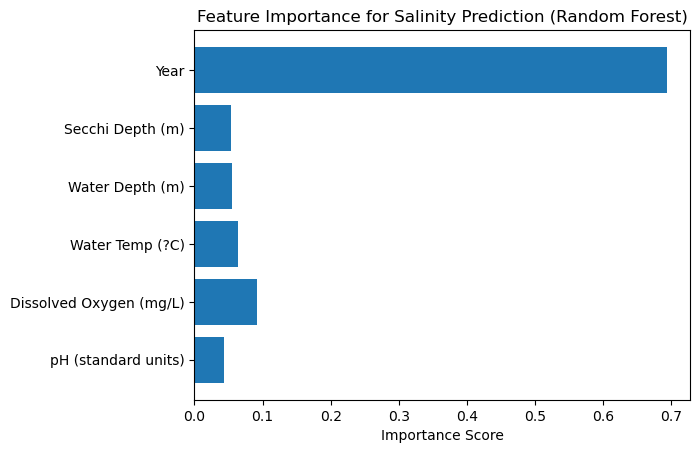

In [13]:
importance = rf.feature_importances_

plt.figure()
plt.barh(X.columns, importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance for Salinity Prediction (Random Forest)")
plt.show()


In [15]:
lr_df = df[
    ["pH (standard units)", "Dissolved Oxygen (mg/L)"]
].dropna()

In [17]:
X = lr_df[["pH (standard units)"]]
y = lr_df["Dissolved Oxygen (mg/L)"]


In [21]:
model_lr = LinearRegression()
model_lr.fit(X, y)

y_pred = model_lr.predict(X)

print("R² Score:", r2_score(y, y_pred))
print("Slope (Coefficient):", model_lr.coef_[0])
print("Intercept:", model_lr.intercept_)


R² Score: 0.0031257683175413
Slope (Coefficient): 0.17397845071959744
Intercept: 5.4151829147041175


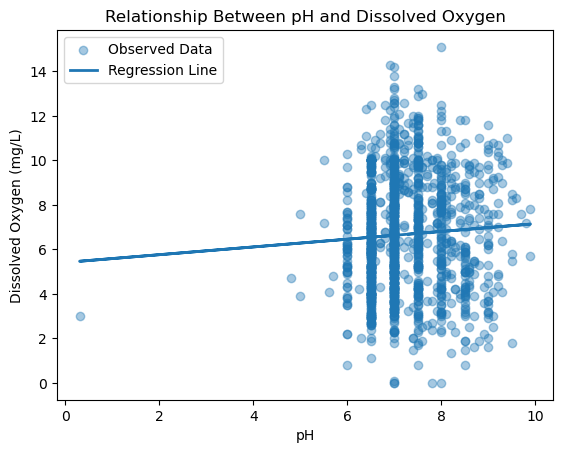

In [23]:

plt.figure()
plt.scatter(X, y, alpha=0.4, label="Observed Data")
plt.plot(X, y_pred, linewidth=2, label="Regression Line")
plt.xlabel("pH")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.title("Relationship Between pH and Dissolved Oxygen")
plt.legend()
plt.show()

In [25]:
# ---------------------------
# TERMINAL MENU
# ---------------------------
def menu():
    print("\n===================================")
    print("  WATER QUALITY PREDICTION SYSTEM")
    print("===================================")
    print("1. Check Oxygen Level in Water")
    print("   (Dissolved Oxygen Prediction)")
    print("2. Exit")

while True:
    menu()
    choice = input("\nSelect an option (1-2): ").strip()

    # ---------------------------------
    # Dissolved Oxygen Prediction
    # ---------------------------------
    if choice == "1":
        print("\n--- Oxygen Level in Water ---")
        print("Dissolved Oxygen indicates how much oxygen")
        print("is available in water for aquatic life.\n")

        ph = float(input("Enter water pH value: "))

        # Use DataFrame to avoid sklearn warning
        input_df = pd.DataFrame(
            [[ph]],
            columns=["pH (standard units)"]
        )

        do_pred = model_lr.predict(input_df)

        print("\nRESULT:")
        print(f"Estimated Dissolved Oxygen: {do_pred[0]:.2f} mg/L")
        print("Interpretation: Higher values indicate better water quality.")

    # ---------------------------------
    # Exit
    # ---------------------------------
    elif choice == "2":
        print("\nSystem closed successfully.")
        print("Thank you for using the Water Quality Predictor.")
        break

    else:
        print("\nInvalid option. Please choose 1 or 2.")



  WATER QUALITY PREDICTION SYSTEM
1. Check Oxygen Level in Water
   (Dissolved Oxygen Prediction)
2. Exit



Select an option (1-2):  1



--- Oxygen Level in Water ---
Dissolved Oxygen indicates how much oxygen
is available in water for aquatic life.



Enter water pH value:  25



RESULT:
Estimated Dissolved Oxygen: 9.76 mg/L
Interpretation: Higher values indicate better water quality.

  WATER QUALITY PREDICTION SYSTEM
1. Check Oxygen Level in Water
   (Dissolved Oxygen Prediction)
2. Exit



Select an option (1-2):  2



System closed successfully.
Thank you for using the Water Quality Predictor.
